<div style="padding:15px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color: #FF0000 ;letter-spacing:1px;overflow:hidden"><b> Hand Written Digits Class Prediction</b></div>

<div style="text-align: center;">
  <b>If you want to be the first to be informed about new projects, please do not forget to follow us - by Fatma Nur AZMAN</b><br>
  <a href="https://fatmanurazman.vercel.app/" style="color:#FF0000;">Fatmanurazman.com</a> | 
  <a href="https://www.linkedin.com/in/fatma-nur-azman/" style="color:#FF0000;">Linkedin</a> | 
  <a href="https://github.com/Fatma-Nur-Azman" style="color:#FF0000;">Github</a> | 
  <a href="https://www.kaggle.com/fnurazman" style="color:#FF0000;">Kaggle</a> | 
  <a href="https://public.tableau.com/app/profile/fatma.nur.azman/vizzes" style="color:#FF0000;">Tableau</a>

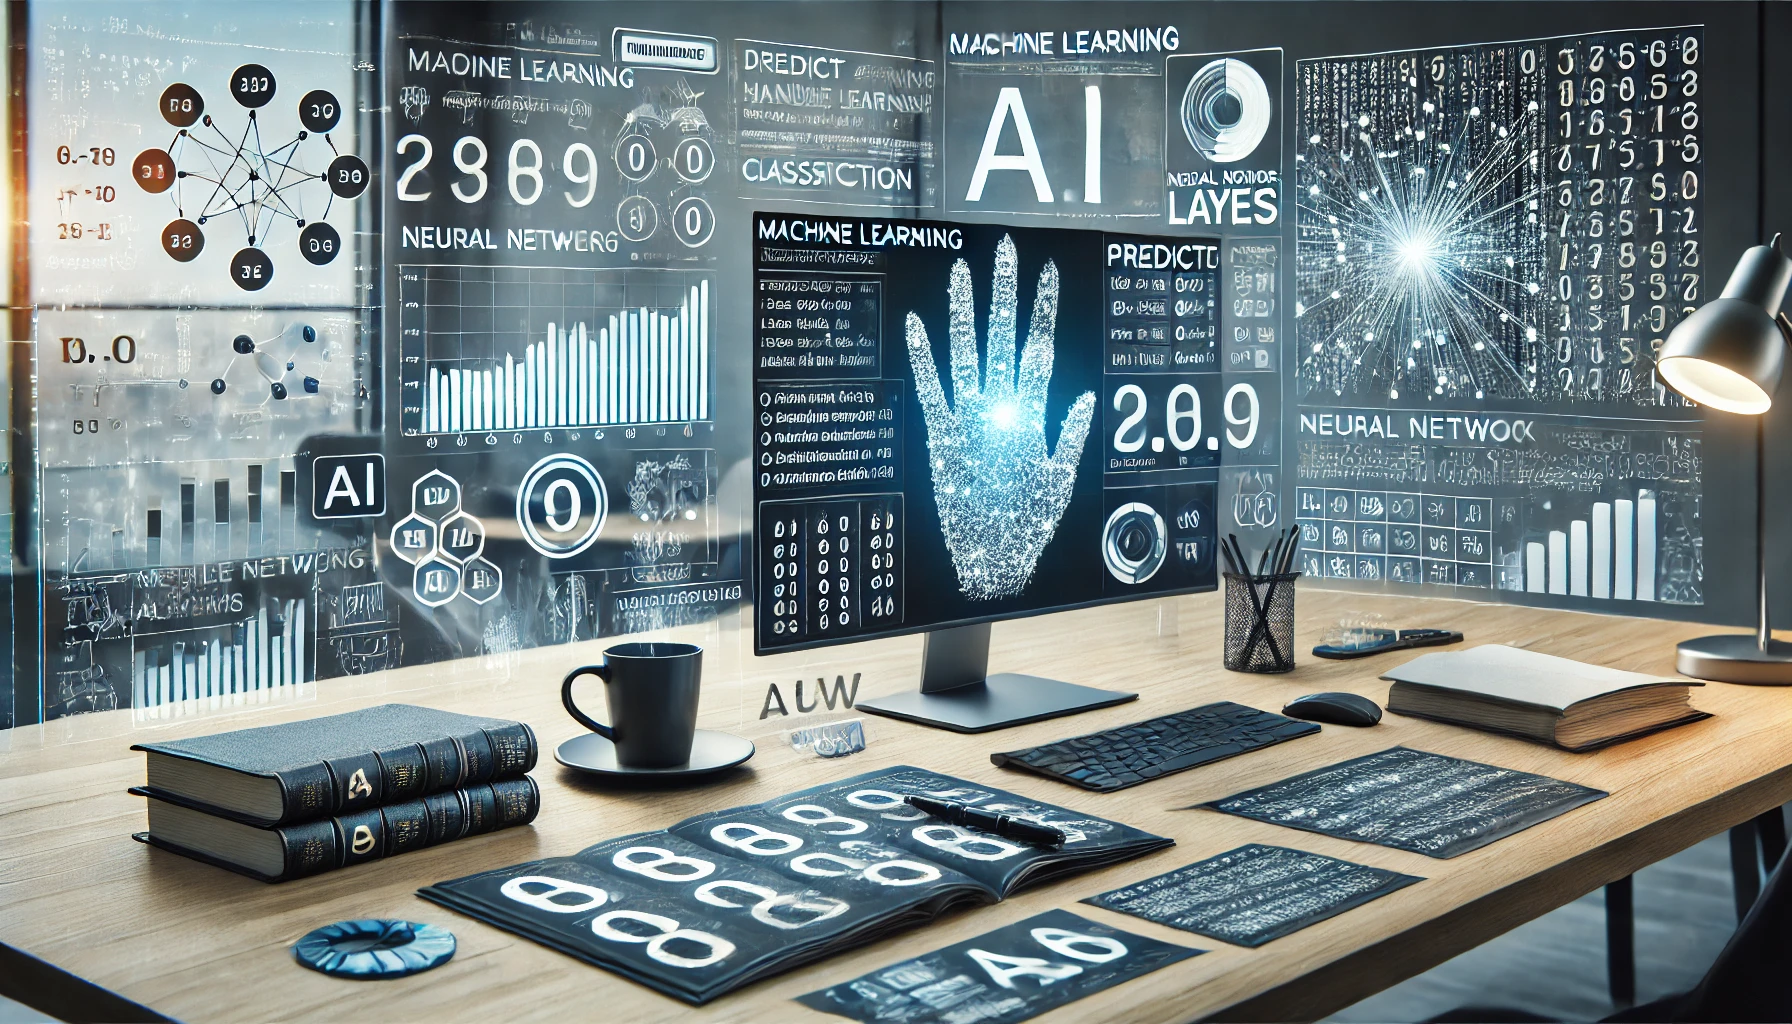

# <font color= #FF0000> <b> Table of CONTENTS </b></font>

- [Understanding The Data](#understanding-the-data)
- [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
- [Vanillin model comparison](#vanillin-model-comparison)
  - [SVC](#svc)
  - [DT](#dt)
  - [RF](#rf)
  - [Vanillin model comparison](#vanillin-model-comparison)
- [Support Vector Machine (SVM) Classifier](#support-vector-machine)
- [Decision Tree Classification Model](#decision-tree-classification-model)
- [Random Forest Classifier](#random-forest-classifier)
- [Compare Models Performance](#compare-models-performance)
- [Choose the Best Model](#choose-the-best-model)
- [Conclusion](#conclusion)


<a id="understanding-the-data"></a>
# <font color= #FF0000> <b> Understanding The Data</b><font color= #FF0000>

**Data Set Information:**

1. [TÜBİTAK Article](https://journals.tubitak.gov.tr/cgi/viewcontent.cgi?article=3717&context=elektrik)
2. [UCI Machine Learning Repository: Pen-Based Recognition of Handwritten Digits Dataset](https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits)

<h2 align="left">Project Description:</font></h2>  

- It is a dataset used for recognizing handwritten digits.
- The dataset contains scanned images of handwritten digits.
- The dataset has a total of 10 classes, and each class represents a digit from 0 to 9.
- 250 samples have been collected from 44 subjects.
- The dataset includes not only the image data but also the information about which digit each image represents.

**Pen-Based Recognition of Handwritten Digits**

- We create a digit database by collecting 250 samples from a total of 44 writers. The samples written by 30 writers are used for training, cross-validation, and writer-dependent testing, while the digits written by the remaining 14 writers are used for writer-independent testing. This database is also available in the UNIPEN format.

- We use a WACOM PL-100V pressure-sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. This tablet, connected to the serial port of an Intel 486-based computer, allows us to collect handwriting samples. The tablet sends the 𝑥 and 𝑦 tablet coordinates and the pressure level values of the pen at fixed time intervals (sampling rate) of 100 milliseconds.

- These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution. Subjects are monitored only during the initial input screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are instructed to write only inside these boxes. If they make a mistake or are not satisfied with their writing, they are instructed to clear the content of a box using an on-screen button. The first ten digits are ignored because most writers are not familiar with this type of input device, although the subjects are not aware of this.

- In our study, we use only the (𝑥,𝑦) coordinate information. The stylus pressure level values are ignored. First, we apply normalization to make our representation invariant to translations and scale distortions. The raw data captured from the tablet consist of integer values between 0 and 500 (tablet input box resolution). The new coordinates are such that the coordinate with the maximum range is scaled between 0 and 100. Usually, 𝑥 stays within this range, as most characters are taller than they are wide.

<h2 align="left"> About the Dataset  </font></h2>

**Dataset Descriptions:** 
- **Rows:** 10992
- **Columns:** 17

**Feature Information**

To train and test our models, we need to represent digits as fixed-length feature vectors. A commonly used technique that yields good results is the resampling of the (x_t, y_t) points. Here, either temporal resampling (points spaced regularly over time) or spatial resampling (points spaced regularly in arc length) can be used. The raw point data are already spaced regularly over time, but the distance between them is variable. Previous research has shown that spatial resampling to obtain a constant number of evenly spaced points along the trajectory performs much better, as it provides better alignment between points. Our resampling algorithm uses simple linear interpolation between pairs of points. The resampled digits are represented as a sequence of T points (x_t, y_t)_{t=1}^T, regularly spaced in arc length, as opposed to the input sequence, which is spaced regularly over time.

Thus, the input vector size is 2*T, which is twice the number of resampled points. In our experiments, we considered spatial resampling to T=8, 12, and 16 points, and found that T=8 provided the best trade-off between accuracy and complexity.

## Import Libraries and Data Review

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline 

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report


from yellowbrick.classifier import ClassPredictionError, ROCAUC

import warnings
warnings.filterwarnings("ignore")

In [3]:
df0 = pd.read_csv('pendigits_txt.csv')
df = df0.copy()

<a id="exploratory-data-analysis"></a>
# <font color= #FF0000> <b> Exploratory Data Analysis (EDA)</b><font color= #FF0000>

In [4]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    Min = df.min(numeric_only=True)
    Max = df.max(numeric_only=True)
    
    # Calculate the percentage of null values
    NullPercent = (Nulls / obs) * 100
    
    # Calculate the number of duplicate rows
    duplicate_count = df.duplicated().sum()
    
    # Create a new column to store unique values for columns with 10 or fewer unique values, otherwise '-'
    UniqueValues = df.apply(lambda x: list(x.unique()) if x.nunique() <= 10 else '-')

    # Display df.shape and duplicate count at the beginning
    print(f'1. Data shape (rows, columns): {df.shape}')
    print(f'2. Number of duplicate rows: {duplicate_count}')
    
    if pred is None:
        # Adjusted order with 'Uniques' at a more prominent position
        summary_df = pd.DataFrame({
            'Dtype': Types, 
            'Counts': Counts, 
            'Nulls': Nulls, 
            'NullPercent': NullPercent, 
            'Min': Min, 
            'Max': Max, 
            'Uniques': Uniques,
            'UniqueValues': UniqueValues
        })

    print('___________________________\nData Types:')
    print(summary_df['Dtype'].value_counts())
    print('___________________________')
    return summary_df

summary(df)

1. Data shape (rows, columns): (10992, 17)
2. Number of duplicate rows: 0
___________________________
Data Types:
Dtype
int64    17
Name: count, dtype: int64
___________________________


Dtype  Counts  Nulls  NullPercent  Min  Max  Uniques  \
input1   int64   10992      0          0.0    0  100      101   
input2   int64   10992      0          0.0    0  100       96   
input3   int64   10992      0          0.0    0  100      101   
input4   int64   10992      0          0.0    0  100       98   
input5   int64   10992      0          0.0    0  100      101   
input6   int64   10992      0          0.0    0  100      101   
input7   int64   10992      0          0.0    0  100      101   
input8   int64   10992      0          0.0    0  100      101   
input9   int64   10992      0          0.0    0  100      101   
input10  int64   10992      0          0.0    0  100      101   
input11  int64   10992      0          0.0    0  100      101   
input12  int64   10992      0          0.0    0  100      101   
input13  int64   10992      0          0.0    0  100      101   
input14  int64   10992      0          0.0    0  100      101   
input15  int64   10992      0          0.0    0  100      101   
input16  int64   10992      0          0.0    0  100      101   
class    int64   10992      0          0.0    0    9       10   

                           UniqueValues  
input1                                -  
input2                                -  
input3                                -  
input4                                -  
input5                                -  
input6                                -  
input7                                -  
input8                                -  
input9                                -  
input10                               -  
input11                               -  
input12                               -  
input13                               -  
input14                               -  
input15                               -  
input16                               -  
class    [8, 2, 1, 4, 6, 0, 5, 9, 7, 3]

In [5]:
df.describe().T

count       mean        std  min   25%   50%    75%    max
input1   10992.0  38.814320  34.257783  0.0   6.0  32.0   65.0  100.0
input2   10992.0  85.120269  16.218571  0.0  76.0  89.0  100.0  100.0
input3   10992.0  40.605622  26.342984  0.0  20.0  40.0   58.0  100.0
input4   10992.0  83.774199  19.163646  0.0  72.0  91.0  100.0  100.0
input5   10992.0  49.770378  34.100515  0.0  18.0  53.0   78.0  100.0
input6   10992.0  65.573144  26.996688  0.0  49.0  71.0   86.0  100.0
input7   10992.0  51.220251  30.576881  0.0  28.0  53.5   74.0  100.0
input8   10992.0  44.498999  29.906104  0.0  23.0  43.0   64.0  100.0
input9   10992.0  56.868541  34.135530  0.0  29.0  60.0   89.0  100.0
input10  10992.0  33.695961  27.251548  0.0   7.0  33.0   54.0  100.0
input11  10992.0  60.516376  37.288086  0.0  23.0  73.0   97.0  100.0
input12  10992.0  34.826510  27.119982  0.0  11.0  30.0   55.0  100.0
input13  10992.0  55.022289  22.335539  0.0  42.0  53.0   68.0  100.0
input14  10992.0  34.937045  33.155463  0.0   5.0  27.0   47.0  100.0
input15  10992.0  47.287482  41.760400  0.0   0.0  40.0  100.0  100.0
input16  10992.0  28.845342  35.778094  0.0   0.0   9.0   51.0  100.0
class    10992.0   4.431587   2.876947  0.0   2.0   4.0    7.0    9.0

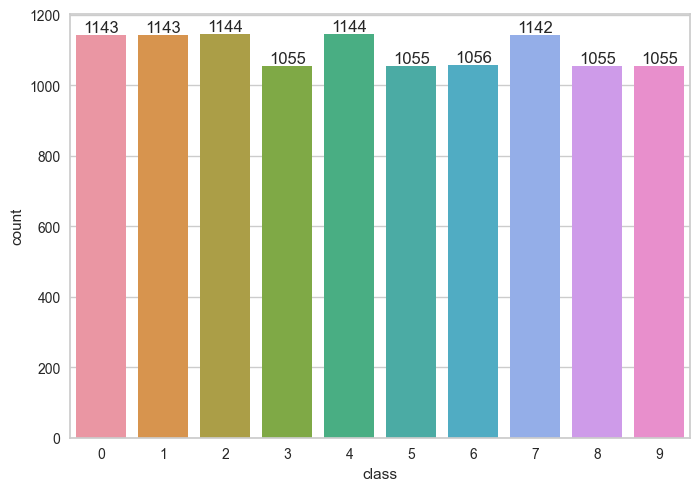

In [6]:
ax = sns.countplot(x="class", data=df)
ax.bar_label(ax.containers[0]);

In [7]:
import cufflinks as cf  
cf.go_offline()
df.iloc[:,1:].iplot(kind="box")

## Features Summary

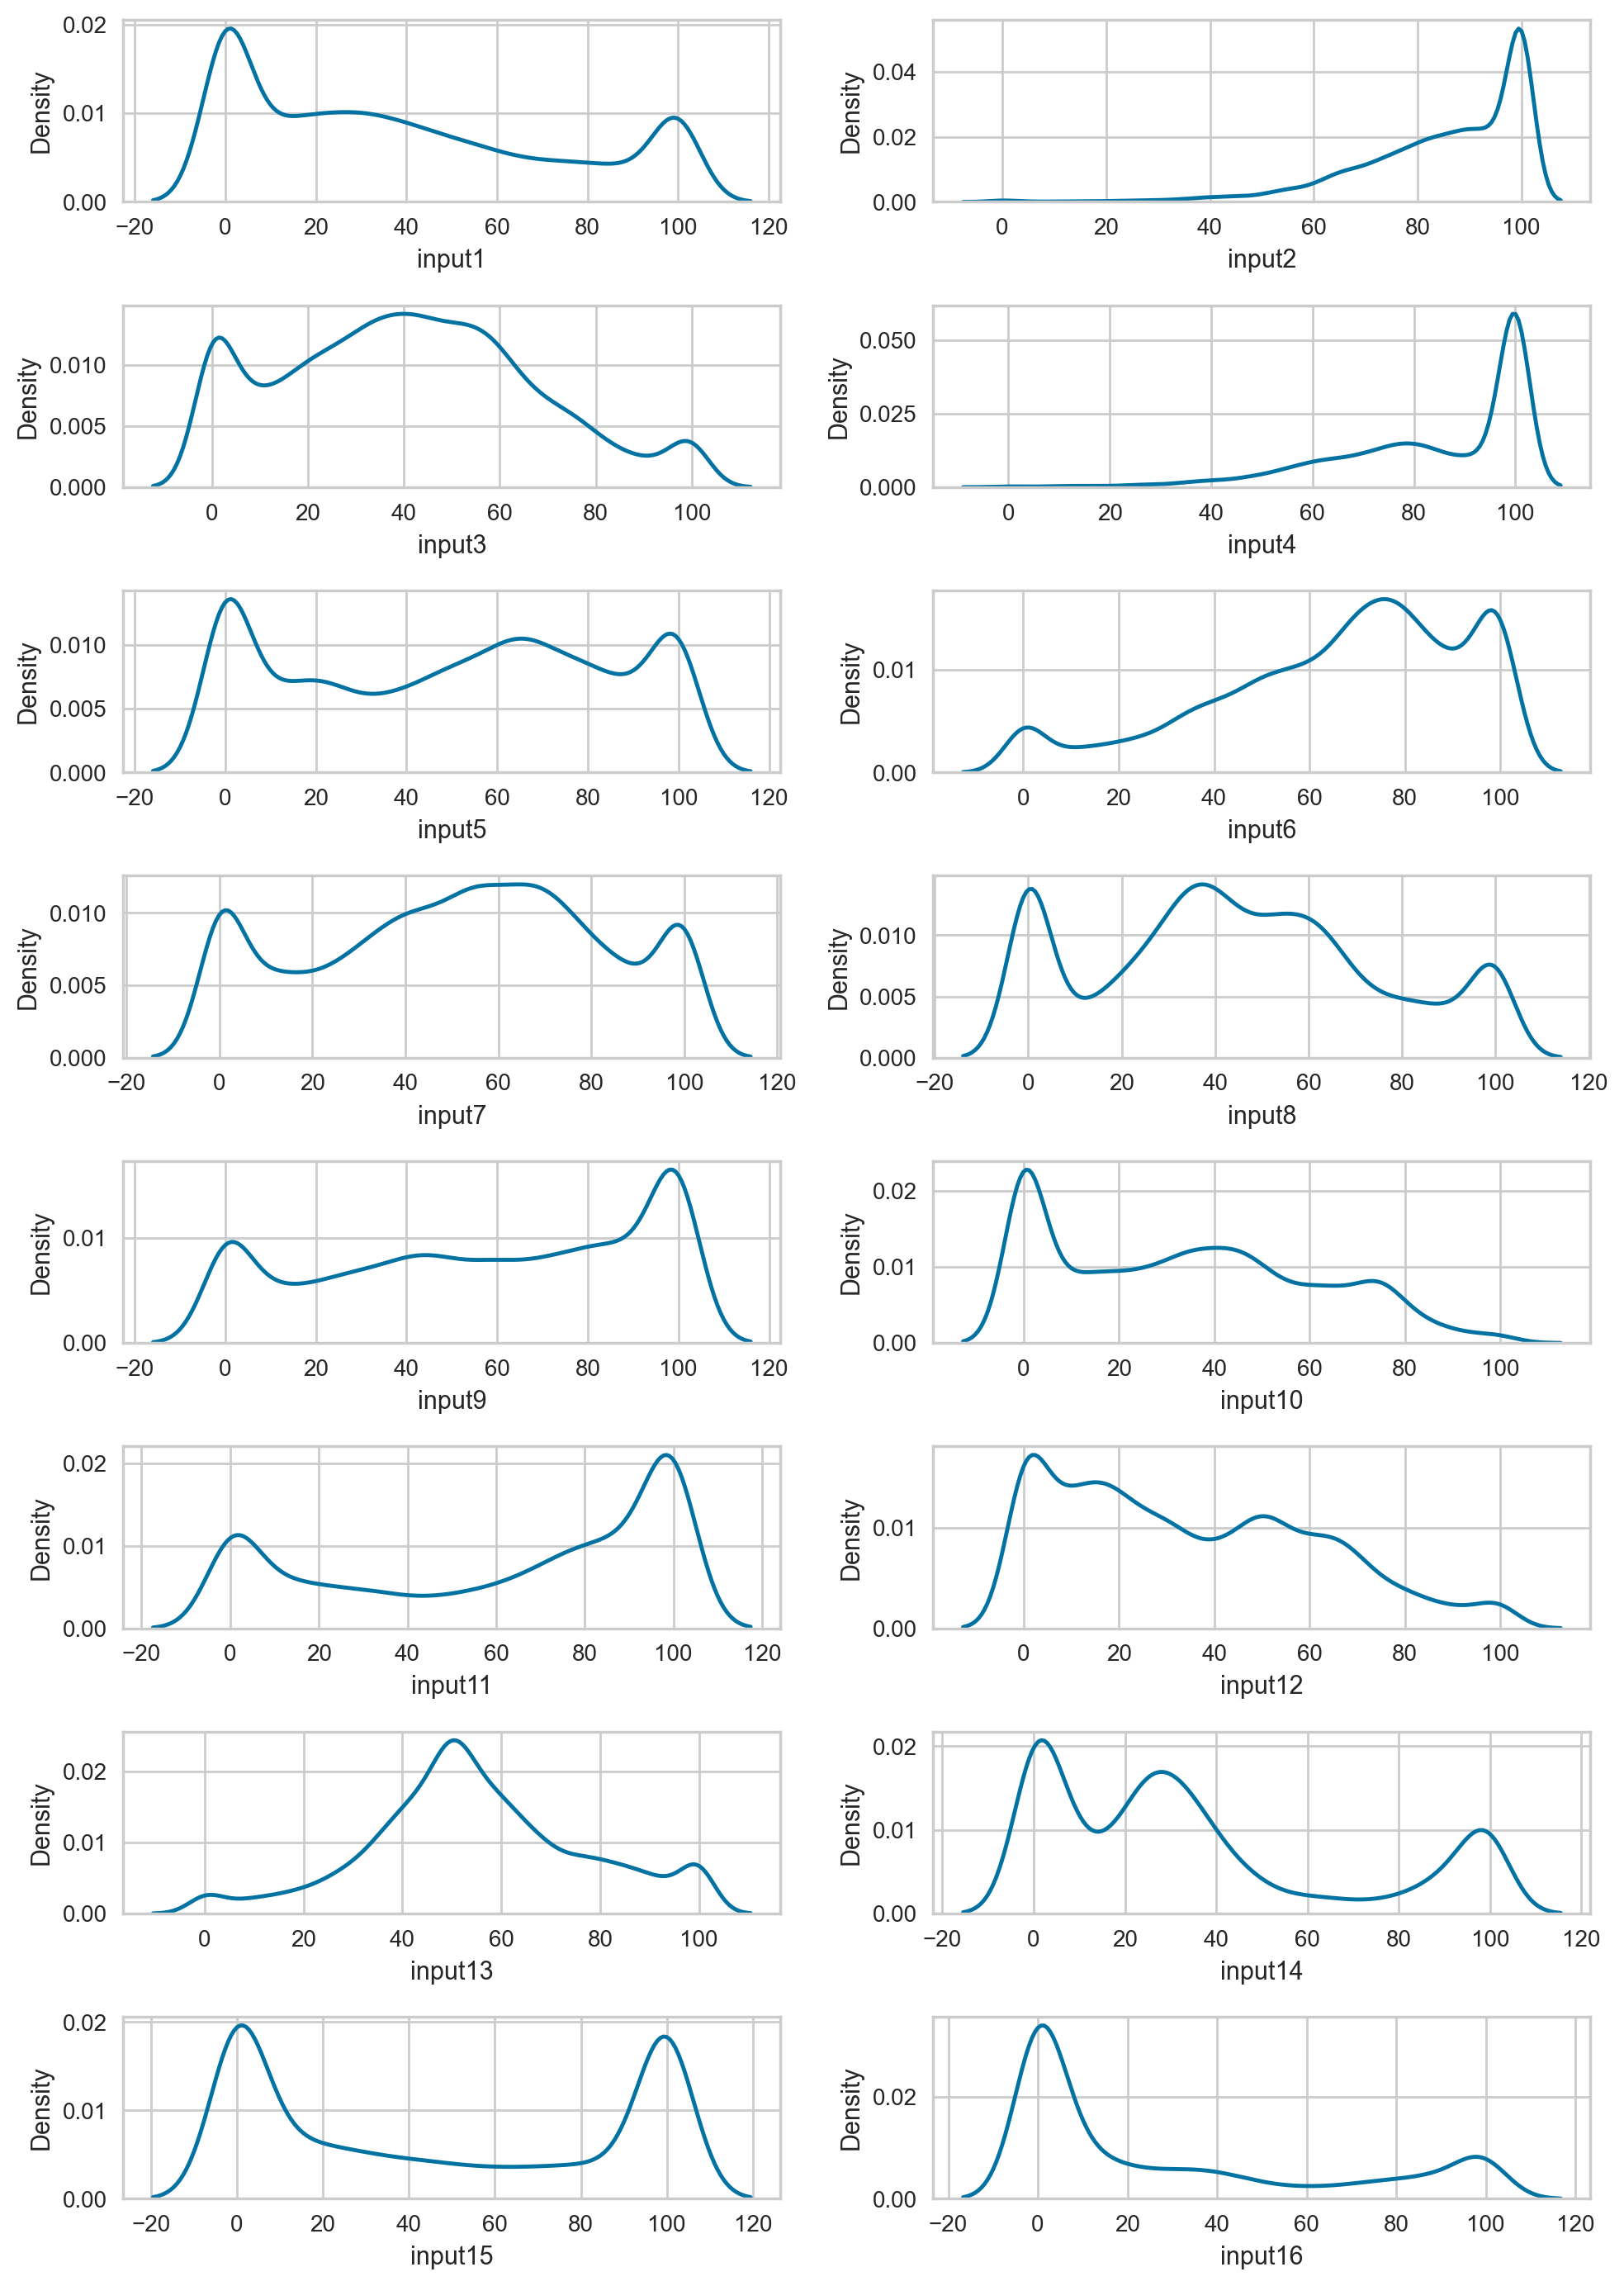

In [37]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col])
plt.tight_layout();

In [39]:
def plot_feature_outliers(df, hue_column):
    plt.figure(figsize=(20,30))
    for i, col in enumerate(df.columns[:-1], 1):
        plt.subplot(9, 2, i)
        plt.title(f"Distribution of {col} Data with Outliers")
        sns.boxplot(x=hue_column, y=col, data=df)
        plt.tight_layout()
    plt.show()

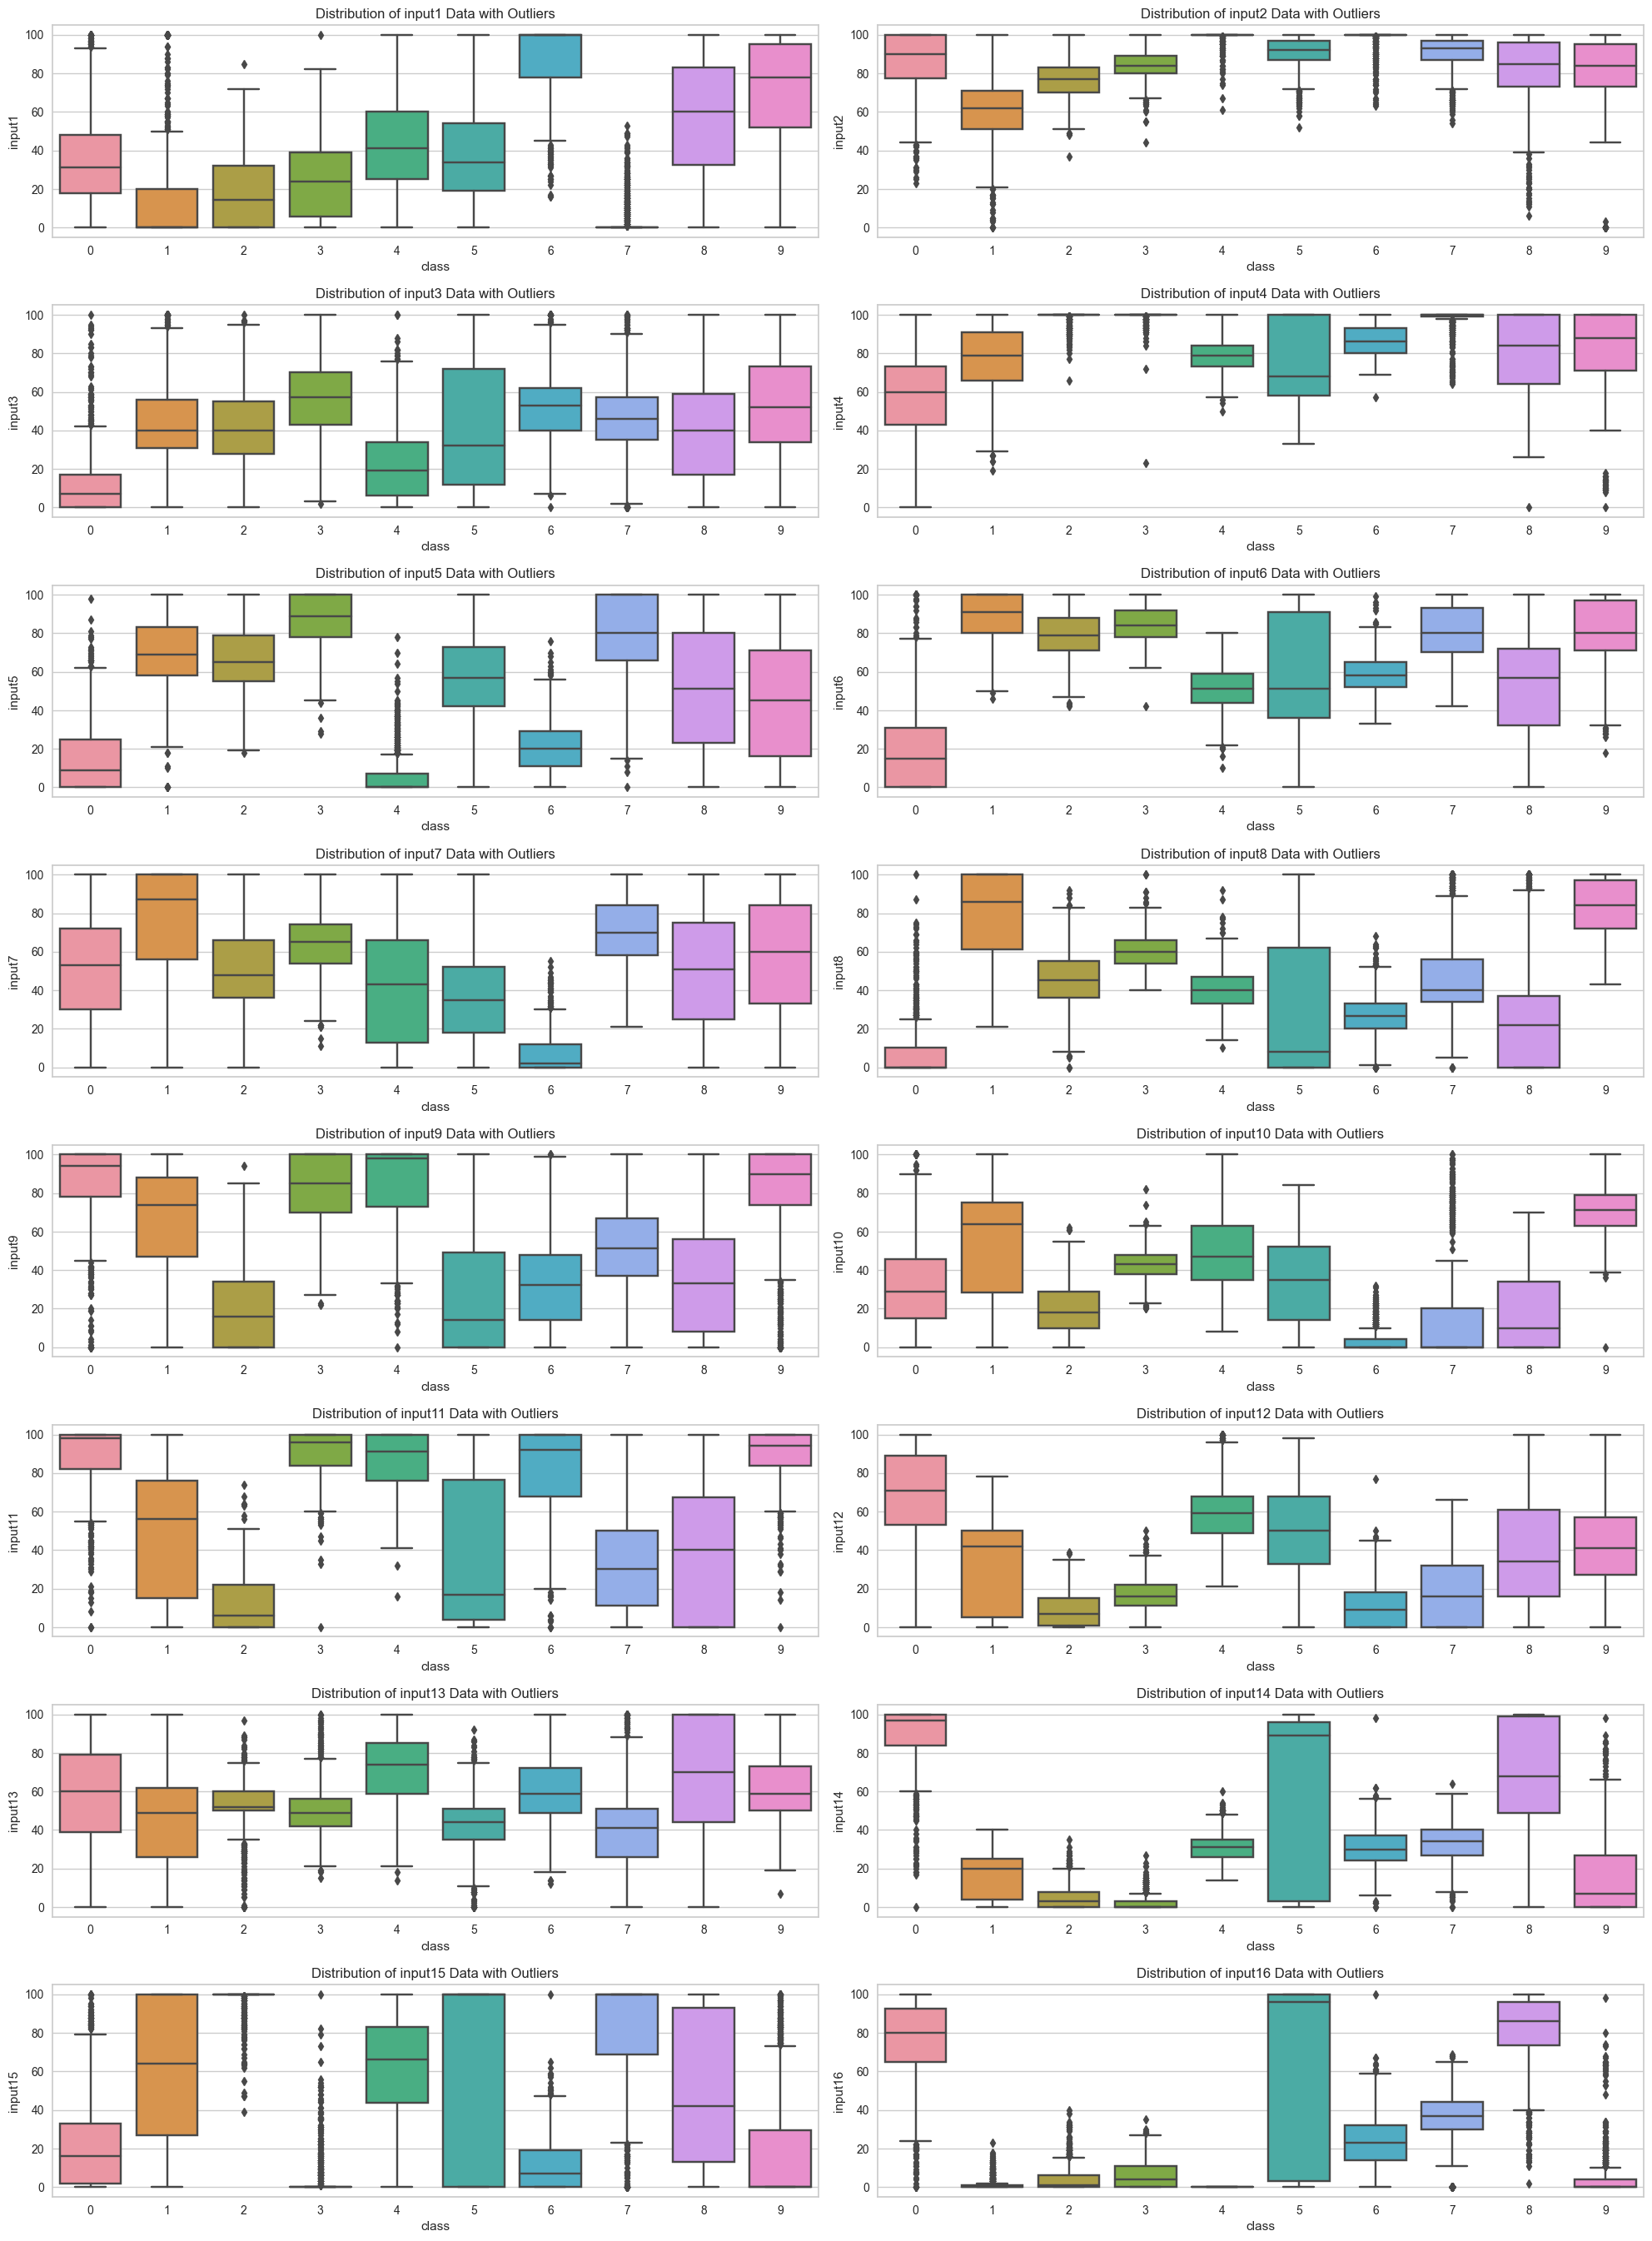

In [40]:
plot_feature_outliers(df, "class")

## Correlation 

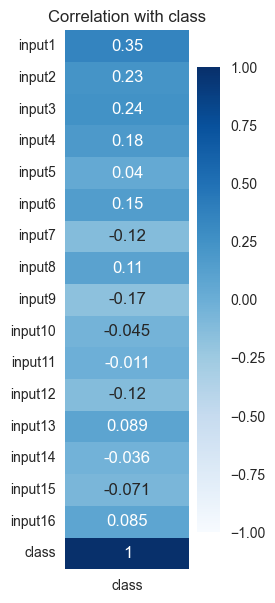

In [32]:
def plot_target_correlation_heatmap(df, target_variable):
    
    df_numeric = df.select_dtypes(include=[np.number])
    df_corr_target = df_numeric.corr()
    
    # Hedef değişkenle korelasyonları içeren ısı haritası oluşturma
    plt.figure(figsize=(2, 7))
    sns.heatmap(df_corr_target[[target_variable]], annot=True, vmin=-1, vmax=1, cmap="Blues")
    plt.title(f'Correlation with {target_variable}')
    plt.show()
plot_target_correlation_heatmap(df, 'class')

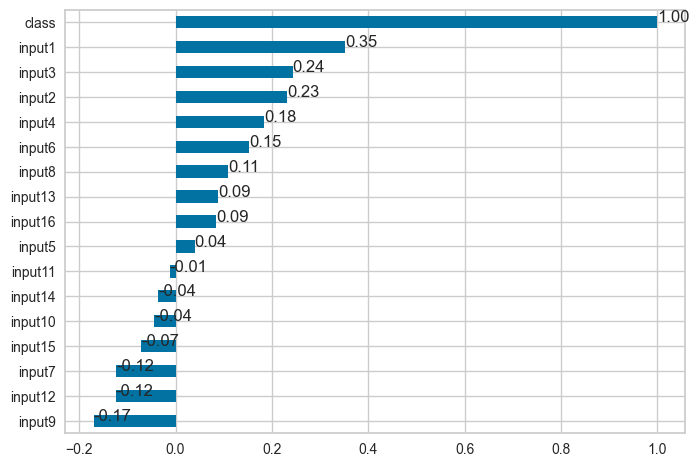

In [34]:
corr_values = df.corr()["class"].sort_values()
ax = corr_values.plot.barh()
for index, value in enumerate(corr_values):
    plt.text(value, index, "{:.2f}".format(value))

plt.show()

## Train | Test Split

In [8]:
X = df.drop("class", axis=1)
y = df['class'] 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    shuffle=False,
                                                    random_state=42)

## Scaling

In [10]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id="vanillin-model-comparison"></a>
# <font color= #FF0000> <b>Vanillin model comparison </b><font color= #FF0000>

In [11]:
def eval_metric(model, X_train, y_train, X_test, y_test,i):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(f"{i} Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print(f"{i} Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

<a id="svc"></a>
## SVC

In [12]:
SVM_model = SVC(random_state=101)
SVM_model.fit(X_train_scaled, y_train)

SVC(random_state=101)

In [13]:
y_pred_test = SVM_model.predict(X_test_scaled)
y_pred_train = SVM_model.predict(X_train_scaled)

SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

eval_metric(SVM_model, X_train_scaled, y_train, X_test_scaled, y_test, "svm")

svm Test_Set
[[106   0   0   0   0   0   0   0   0   0]
 [  0 109   1   0   0   0   0   0   0   0]
 [  0   1 119   0   0   0   0   0   0   0]
 [  0   0   0 115   0   0   0   0   0   1]
 [  0   0   0   0 119   0   0   0   0   0]
 [  0   0   0   2   0  96   0   0   0   1]
 [  0   0   0   0   0   0 105   0   0   0]
 [  0   1   1   0   0   0   0 108   0   0]
 [  0   0   0   0   0   0   0   0 104   0]
 [  0   0   0   0   0   1   0   2   0 108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.98      0.99      0.99       110
           2       0.98      0.99      0.99       120
           3       0.98      0.99      0.99       116
           4       1.00      1.00      1.00       119
           5       0.99      0.97      0.98        99
           6       1.00      1.00      1.00       105
           7       0.98      0.98      0.98       110
           8       1.00      1.00      1.00       104
           9   

In [52]:
model = SVC()

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.994541
train_accuracy           0.995518
test_precision_macro     0.994600
train_precision_macro    0.995538
test_recall_macro        0.994594
train_recall_macro       0.995542
test_f1_macro            0.994567
train_f1_macro           0.995534
dtype: float64

<a id="dt"></a>
## DT

In [14]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred_test = DT_model.predict(X_test)
y_pred_train = DT_model.predict(X_train)

DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_f1_train = f1_score(y_train, y_pred_train, average='macro')

eval_metric(DT_model, X_train, y_train, X_test, y_test, "DT")

DT Test_Set
[[106   0   0   0   0   0   0   0   0   0]
 [  0 105   5   0   0   0   0   0   0   0]
 [  0   3 116   0   0   0   0   1   0   0]
 [  0   4   0 111   0   0   0   0   0   1]
 [  0   0   0   0 117   1   1   0   0   0]
 [  0   0   0   5   0  90   0   1   0   3]
 [  2   2   0   0   0   0 100   0   1   0]
 [  0   6   2   1   0   0   0 100   1   0]
 [  0   0   0   0   0   0   0   1 103   0]
 [  0   0   0   2   0   1   1   1   1 105]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       106
           1       0.88      0.95      0.91       110
           2       0.94      0.97      0.95       120
           3       0.93      0.96      0.94       116
           4       1.00      0.98      0.99       119
           5       0.98      0.91      0.94        99
           6       0.98      0.95      0.97       105
           7       0.96      0.91      0.93       110
           8       0.97      0.99      0.98       104
           9    

In [55]:
model = DecisionTreeClassifier()

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.958653
train_accuracy           1.000000
test_precision_macro     0.959147
train_precision_macro    1.000000
test_recall_macro        0.958855
train_recall_macro       1.000000
test_f1_macro            0.958764
train_f1_macro           1.000000
dtype: float64

<a id="rf"></a>
## RF

In [15]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred_test = RF_model.predict(X_test)
y_pred_train = RF_model.predict(X_train)

RF_accuracy_test = accuracy_score(y_test, y_pred_test)
RF_accuracy_train = accuracy_score(y_train, y_pred_train)

RF_f1_test = f1_score(y_test, y_pred_test, average='macro')
RF_f1_train = f1_score(y_train, y_pred_train, average='macro')

eval_metric(RF_model, X_train, y_train, X_test, y_test, "RF")

RF Test_Set
[[106   0   0   0   0   0   0   0   0   0]
 [  0 105   5   0   0   0   0   0   0   0]
 [  0   1 119   0   0   0   0   0   0   0]
 [  0   0   0 115   0   0   0   0   0   1]
 [  0   0   0   0 119   0   0   0   0   0]
 [  0   0   0   3   0  95   0   0   0   1]
 [  0   0   0   0   0   0 105   0   0   0]
 [  0   2   1   0   0   0   0 107   0   0]
 [  0   0   0   0   0   0   0   0 104   0]
 [  0   1   0   0   0   0   0   1   0 109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.96      0.95      0.96       110
           2       0.95      0.99      0.97       120
           3       0.97      0.99      0.98       116
           4       1.00      1.00      1.00       119
           5       1.00      0.96      0.98        99
           6       1.00      1.00      1.00       105
           7       0.99      0.97      0.98       110
           8       1.00      1.00      1.00       104
           9    

In [62]:
model = RandomForestClassifier()

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy            0.990901
train_accuracy           1.000000
test_precision_macro     0.991118
train_precision_macro    1.000000
test_recall_macro        0.991002
train_recall_macro       1.000000
test_f1_macro            0.991008
train_f1_macro           1.000000
dtype: float64

 <a id="vanillin-model-comparison"></a>
 ## Vanillin model comparison 

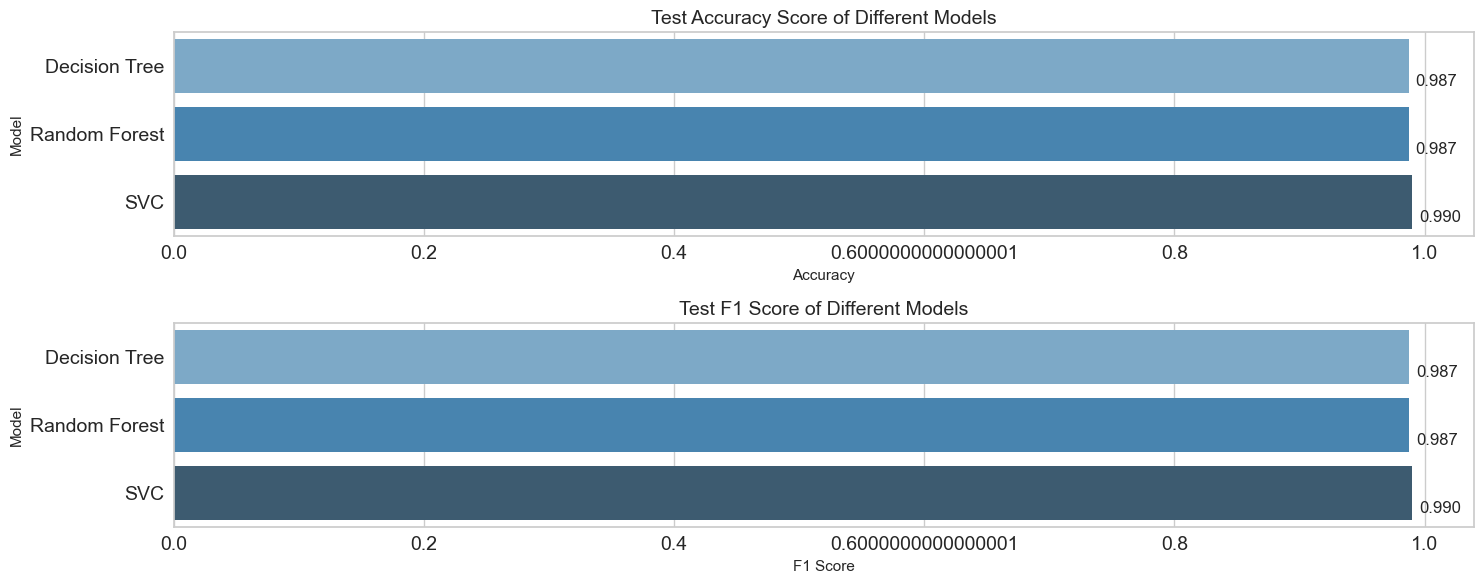

In [72]:
# Verilerin hazırlanması
compare_accuracy = pd.DataFrame({
    "Model": ["SVC", "Decision Tree", "Random Forest"],
    "Accuracy": [SVM_accuracy_test, DT_accuracy_test, RF_accuracy_test]
})

compare_accuracy = compare_accuracy.sort_values(by="Accuracy", ascending=True)

compare_f1 = pd.DataFrame({
    "Model": ["SVC", "Decision Tree", "Random Forest"],
    "F1 Score": [svm_f1_test, DT_f1_test, RF_f1_test]
})

compare_f1 = compare_f1.sort_values(by="F1 Score", ascending=True)

# Grafiklerin oluşturulması
fig, axes = plt.subplots(2, 1, figsize=(15, 6))

# Test Accuracy Score grafiği
ax1 = sns.barplot(x="Accuracy", y="Model", data=compare_accuracy, palette="Blues_d", ax=axes[0])
for p in ax1.patches:
    ax1.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                 xytext=(5, 10), textcoords='offset points')
ax1.set_title("Test Accuracy Score of Different Models", size=14)
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(ax1.get_yticklabels(), size=14)
ax1.set_xticklabels(ax1.get_xticks(), size=14)

# Test F1 Score grafiği
ax2 = sns.barplot(x="F1 Score", y="Model", data=compare_f1, palette="Blues_d", ax=axes[1])
for p in ax2.patches:
    ax2.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                 xytext=(5, 10), textcoords='offset points')
ax2.set_title("Test F1 Score of Different Models", size=14)
ax2.set_yticks(ax2.get_yticks())
ax2.set_yticklabels(ax2.get_yticklabels(), size=14)
ax2.set_xticklabels(ax2.get_xticks(), size=14)

plt.tight_layout()
plt.show()


**Accuracy**: Indicates the proportion of correctly predicted samples.

- SVC (Support Vector Classifier): Has the highest accuracy rate at 99.0%.

- These results show that the SVC model performs slightly better than the others, but all models are making nearly perfect predictions. Based on the accuracy results, it's clear that the models are highly successful in classification.
- However, the difference between train and test in the Decision Tree suggests a possibility of overfitting. I will perform Grid Search to examine it in detail.

**F1 Score**: The harmonic mean of Precision and Recall, especially useful in imbalanced datasets.
- SVC: Again, has the highest F1 score at 99.0%.

<a id="support-vector-machine"></a>
# <font color= #FF0000> <b> Support Vector Machine (SVM) Classifier</b><font color= #FF0000>

In [81]:
param_grid = {'C': [0.1, 1, 1.5],
              'gamma': ["scale", "auto", 0.2, 0.5]}

In [83]:
SVM_model = SVC(kernel="rbf",probability=True)

SVM_model_grid = GridSearchCV(SVM_model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              n_jobs=-1).fit(X_train_scaled, y_train)
# I skipped cv because the scores were close, I already have cv in gridsearch  cv=5

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [84]:
SVM_model_grid.best_params_

{'C': 1.5, 'gamma': 0.2}

In [89]:
y_pred_test = SVM_model_grid.predict(X_test_scaled)
y_pred_train = SVM_model_grid.predict(X_train_scaled)

SVM_accuracy_test = accuracy_score(y_test, y_pred_test)
SVM_accuracy_train = accuracy_score(y_train, y_pred_train)

svm_f1_test = f1_score(y_test, y_pred_test, average='macro')
svm_f1_train = f1_score(y_train, y_pred_train, average='macro')

eval_metric(SVM_model_grid, X_train_scaled, y_train, X_test_scaled, y_test, "svm grid")

svm grid Test_Set
[[106   0   0   0   0   0   0   0   0   0]
 [  0 109   0   0   0   0   0   1   0   0]
 [  0   0 120   0   0   0   0   0   0   0]
 [  0   0   0 115   0   0   0   0   0   1]
 [  0   0   0   0 119   0   0   0   0   0]
 [  0   0   0   2   0  96   0   0   0   1]
 [  0   0   0   0   0   0 104   0   1   0]
 [  0   1   0   0   0   0   0 109   0   0]
 [  0   0   0   0   0   0   0   0 104   0]
 [  0   0   0   0   0   0   0   2   0 109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.99      0.99      0.99       110
           2       1.00      1.00      1.00       120
           3       0.98      0.99      0.99       116
           4       1.00      1.00      1.00       119
           5       1.00      0.97      0.98        99
           6       1.00      0.99      1.00       105
           7       0.97      0.99      0.98       110
           8       0.99      1.00      1.00       104
          

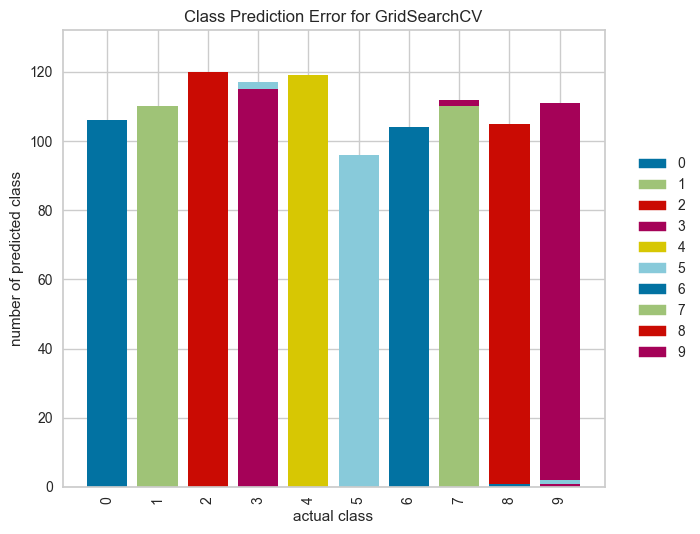

In [91]:
visualizer = ClassPredictionError(SVM_model_grid)

# Fit the training data to the visualizer
visualizer.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
visualizer.score(X_test_scaled, y_test)

# Draw visualization
visualizer.show();

- The model predicts some classes very well, while making a significant number of errors in other classes. Particularly, there are serious prediction errors for classes 3, 7, and 9.
- This chart helps identify which classes are well learned by the model and which ones need improvement.
- For classes with a majority of incorrect predictions, gathering more data or optimizing the model's hyperparameters could be beneficial.

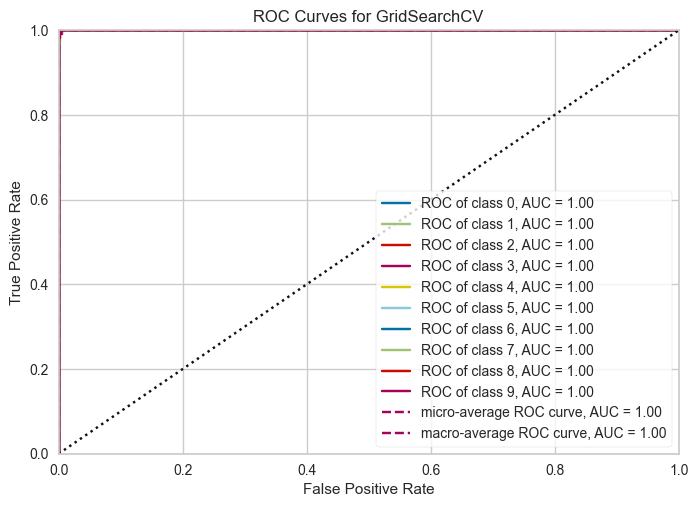

In [93]:
visualizer = ROCAUC(SVM_model_grid, classes=[str(i) for i in range(10)])

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();   

In [95]:
y_pred = SVM_model_grid.predict(X_test_scaled)
residuals = y_test-y_pred

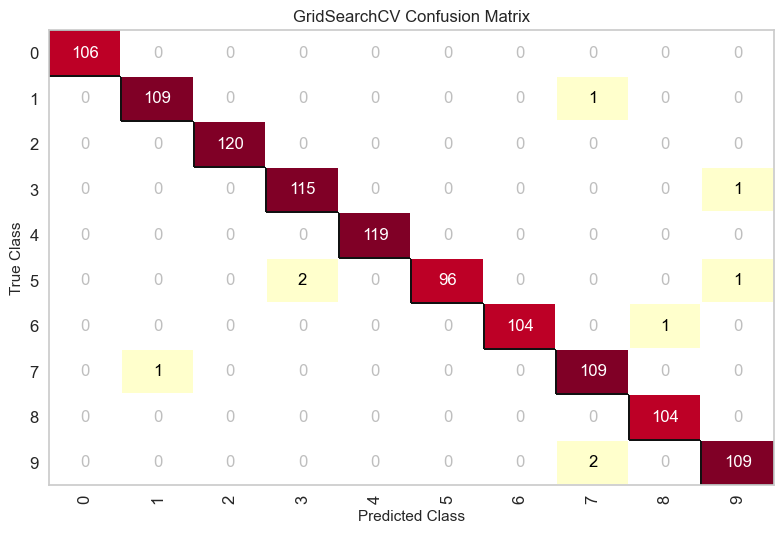

In [103]:
from yellowbrick.classifier import ConfusionMatrix

visualizer = ConfusionMatrix(SVM_model_grid)

visualizer.fit(X_train_scaled, y_train) 
visualizer.score(X_test_scaled, y_test)  
visualizer.show();   

**Correct Classifications**: 

The red cells along the diagonal represent correct predictions. The model has made accurate predictions for most classes, and the counts for these classes are generally high.

**Incorrect Classifications**: 

The yellow cells represent incorrectly predicted examples. The model has experienced confusion between some classes. For example, 2 examples from class 5 were incorrectly predicted as class 3, and 2 examples from class 8 were incorrectly predicted as class 7.

**What Should We Understand?**

By looking at this matrix, we can identify which classes the model performs well on (high counts in the red cells) and which classes experience confusion (counts in the yellow cells).

<a id="decision-tree-classification-model"></a>
# <font color= #FF0000> <b>Desicion Tree Classification Model</b><font color= #FF0000>

In [25]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[10, 11, 12],
             'max_features':[0.1, 0.8],
             'max_leaf_nodes': [200,210],
             'splitter': ['best', 'random'],
             }

DT_model = DecisionTreeClassifier()
DT_grid_model = GridSearchCV(DT_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

DT_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 11, 12], 'max_features': [0.1, 0.8],
                         'max_leaf_nodes': [200, 210],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [26]:
DT_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 0.8,
 'max_leaf_nodes': 210,
 'splitter': 'best'}

In [27]:
y_pred_test = DT_grid_model.predict(X_test)
y_pred_train =DT_grid_model.predict(X_train)

DT_accuracy_test = accuracy_score(y_test, y_pred_test)
DT_accuracy_train = accuracy_score(y_train, y_pred_train)

DT_f1_test = f1_score(y_test, y_pred_test, average='macro')
DT_f1_train = f1_score(y_train, y_pred_train, average='macro')

eval_metric(DT_grid_model, X_train, y_train, X_test, y_test, "DT")

DT Test_Set
[[105   0   0   0   0   0   0   0   1   0]
 [  0 104   6   0   0   0   0   0   0   0]
 [  0   3 116   0   0   0   0   1   0   0]
 [  0   0   0 114   0   0   0   1   0   1]
 [  0   0   0   0 116   0   2   0   0   1]
 [  0   1   1   2   1  89   0   0   1   4]
 [  1   0   1   0   0   1 102   0   0   0]
 [  0   5   2   0   0   0   0 103   0   0]
 [  0   0   0   0   0   1   0   0 103   0]
 [  0   1   0   0   0   2   0   1   0 107]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       106
           1       0.91      0.95      0.93       110
           2       0.92      0.97      0.94       120
           3       0.98      0.98      0.98       116
           4       0.99      0.97      0.98       119
           5       0.96      0.90      0.93        99
           6       0.98      0.97      0.98       105
           7       0.97      0.94      0.95       110
           8       0.98      0.99      0.99       104
           9    

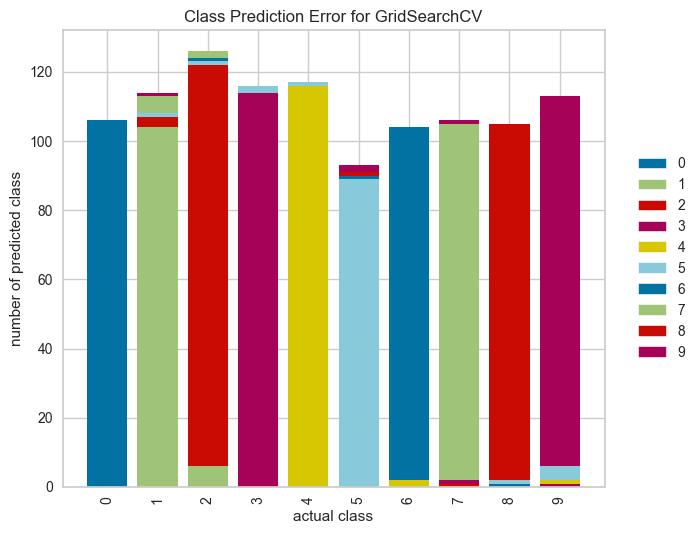

<Axes: title={'center': 'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [28]:
visualizer = ClassPredictionError(DT_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

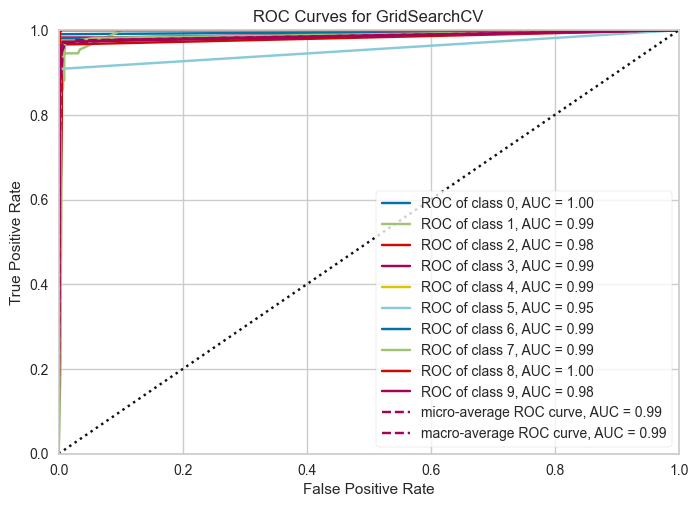

In [29]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(DT_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();                       # Finalize and render the figure

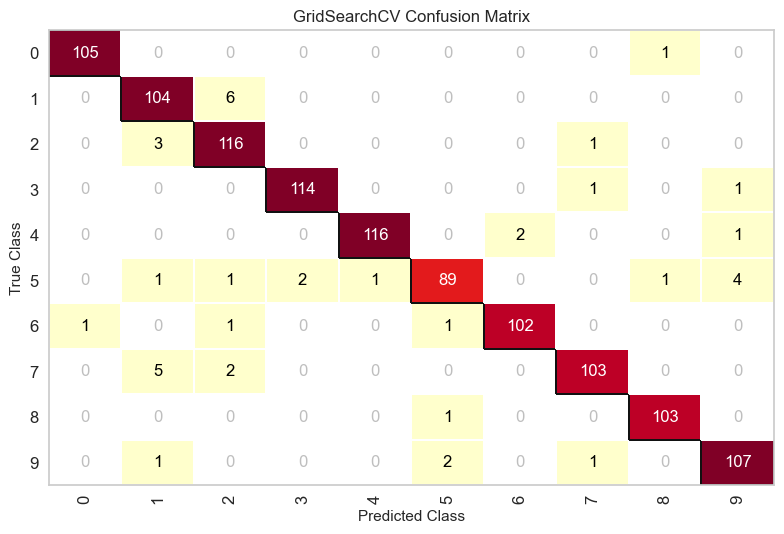

In [30]:
from yellowbrick.classifier import ConfusionMatrix

y_pred = DT_grid_model.predict(X_test)
residuals = y_test-y_pred


visualizer = ConfusionMatrix(DT_grid_model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();   

**Correct Predictions**: 

The red cells along the diagonal represent the correctly predicted samples by the model. It can be said that the model generally performs well across most classes.

**Incorrect Predictions**:

The yellow cells represent the model's incorrect predictions. There is some confusion between certain classes. Notably, there is confusion between classes 1, 5, 7, and 9 with other classes.

- Since there are more incorrect predictions in classes 5 and 7, it may be necessary to improve the model's performance on these classes.

<a id="random-forest-classifier"></a>
# <font color= #FF0000> <b>Random Forest Classifier</b><font color= #FF0000>

In [31]:
param_grid = {
             'criterion': ["entropy","gini"],
             'max_depth':[10, 15],
             'max_features':[ 0.8,1 ],
             'max_leaf_nodes': [180,200],
             'n_estimators':[50,100],
             }

rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=2,
                             scoring="accuracy",
                             n_jobs=-1)

rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [8, 10, 15],
                         'max_features': ['auto', 0.8, 1],
                         'max_leaf_nodes': [180, 200, 220],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [33]:
rf_grid_model.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 0.8,
 'max_leaf_nodes': 200,
 'n_estimators': 100}

In [34]:
y_pred_test = rf_grid_model.predict(X_test)
y_pred_train =rf_grid_model.predict(X_train)

RF_accuracy_test = accuracy_score(y_test, y_pred_test)
RF_accuracy_train = accuracy_score(y_train, y_pred_train)

RF_f1_test = f1_score(y_test, y_pred_test, average='macro')
RF_f1_train = f1_score(y_train, y_pred_train, average='macro')

eval_metric(rf_grid_model, X_train, y_train, X_test, y_test, "RF")

RF Test_Set
[[106   0   0   0   0   0   0   0   0   0]
 [  0 105   5   0   0   0   0   0   0   0]
 [  0   0 120   0   0   0   0   0   0   0]
 [  0   0   0 115   0   0   0   0   0   1]
 [  0   0   0   0 119   0   0   0   0   0]
 [  0   0   0   2   0  96   0   0   0   1]
 [  0   0   0   0   0   0 104   0   1   0]
 [  0   2   1   0   0   0   0 107   0   0]
 [  0   0   0   0   0   0   0   0 104   0]
 [  0   1   0   0   0   0   0   1   0 109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       0.97      0.95      0.96       110
           2       0.95      1.00      0.98       120
           3       0.98      0.99      0.99       116
           4       1.00      1.00      1.00       119
           5       1.00      0.97      0.98        99
           6       1.00      0.99      1.00       105
           7       0.99      0.97      0.98       110
           8       0.99      1.00      1.00       104
           9    

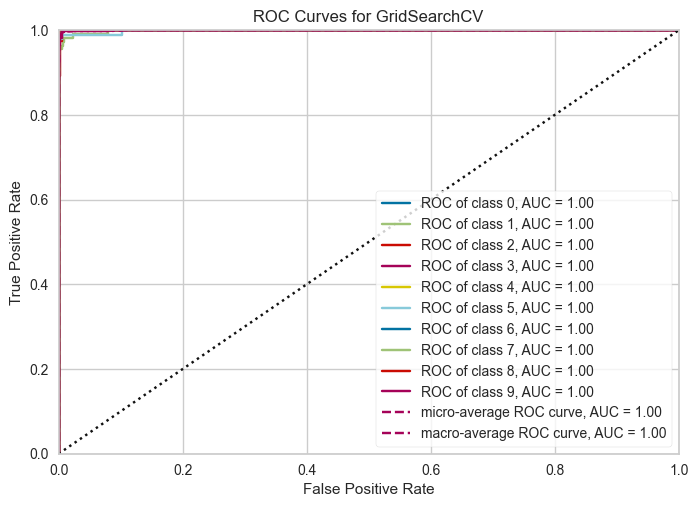

<Axes: title={'center': 'ROC Curves for GridSearchCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [143]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(rf_grid_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

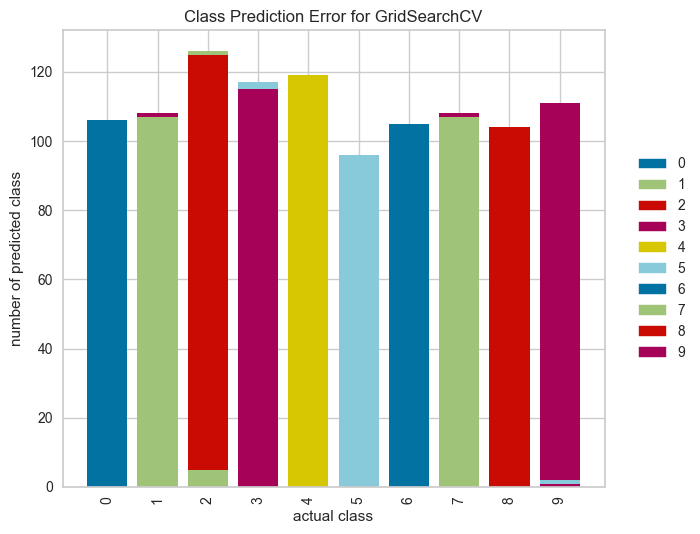

In [145]:
visualizer = ClassPredictionError(rf_grid_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

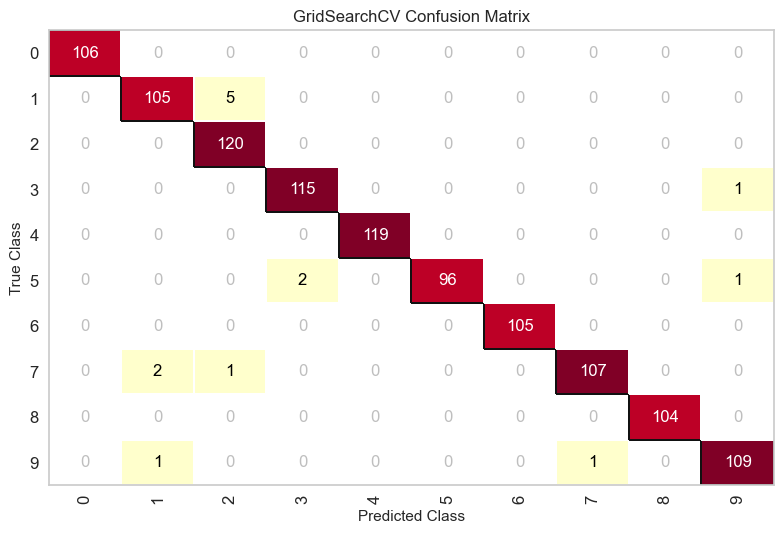

In [146]:
from yellowbrick.classifier import ConfusionMatrix

y_pred = rf_grid_model.predict(X_test)
residuals = y_test-y_pred


visualizer = ConfusionMatrix(rf_grid_model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show();   

<a id="compare-models-performance"></a>
# <font color= #FF0000> <b>Compare Models Performance</b><font color= #FF0000>

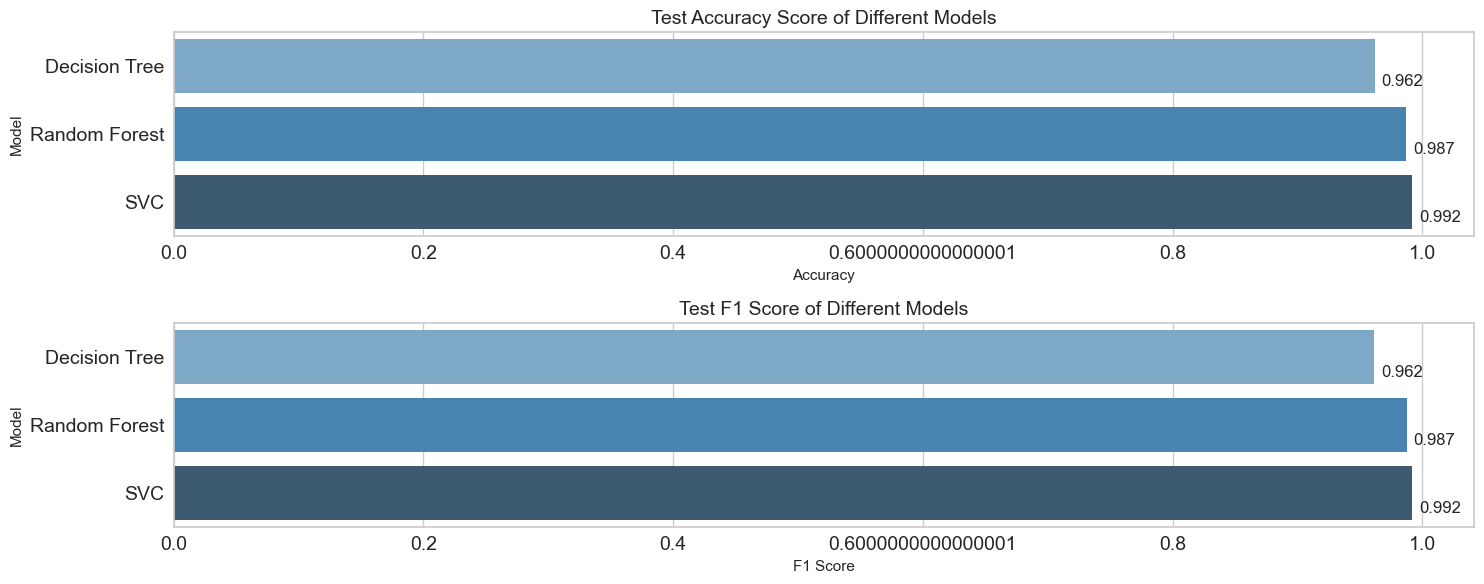

In [147]:
# Verilerin hazırlanması
compare_accuracy = pd.DataFrame({
    "Model": ["SVC", "Decision Tree", "Random Forest"],
    "Accuracy": [SVM_accuracy_test, DT_accuracy_test, RF_accuracy_test]
})

compare_accuracy = compare_accuracy.sort_values(by="Accuracy", ascending=True)

compare_f1 = pd.DataFrame({
    "Model": ["SVC", "Decision Tree", "Random Forest"],
    "F1 Score": [svm_f1_test, DT_f1_test, RF_f1_test]
})

compare_f1 = compare_f1.sort_values(by="F1 Score", ascending=True)

# Grafiklerin oluşturulması
fig, axes = plt.subplots(2, 1, figsize=(15, 6))

# Test Accuracy Score grafiği
ax1 = sns.barplot(x="Accuracy", y="Model", data=compare_accuracy, palette="Blues_d", ax=axes[0])
for p in ax1.patches:
    ax1.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                 xytext=(5, 10), textcoords='offset points')
ax1.set_title("Test Accuracy Score of Different Models", size=14)
ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(ax1.get_yticklabels(), size=14)
ax1.set_xticklabels(ax1.get_xticks(), size=14)

# Test F1 Score grafiği
ax2 = sns.barplot(x="F1 Score", y="Model", data=compare_f1, palette="Blues_d", ax=axes[1])
for p in ax2.patches:
    ax2.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y() + 0.9),
                 xytext=(5, 10), textcoords='offset points')
ax2.set_title("Test F1 Score of Different Models", size=14)
ax2.set_yticks(ax2.get_yticks())
ax2.set_yticklabels(ax2.get_yticklabels(), size=14)
ax2.set_xticklabels(ax2.get_xticks(), size=14)

plt.tight_layout()
plt.show()


<a id="choose-the-best-model"></a>
# <font color= #FF0000> <b> Choose the Best Model</b><font color= #FF0000>

In [156]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [155]:
param_grid = {'C': [1.5],
              'gamma': [0.2]}

SVM_model = SVC(kernel="rbf",probability=True)

final_model = GridSearchCV(SVM_model,
                              param_grid,
                              verbose=2,
                              scoring="accuracy",
                              n_jobs=-1).fit(X_scaled, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [157]:
import pickle
pickle.dump(final_model, open("final_pipe_model", "wb"))

In [158]:
new_model = pickle.load(open("final_pipe_model", "rb"))
new_model

GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1.5], 'gamma': [0.2]}, scoring='accuracy',
             verbose=2)

<a id="conclusion"></a>
# <font color= #FF0000> <b>📂 Conclusion</b><font color= #FF0000>

In [ ]:
# Best Model SVM grid      accuracy: 0.992    f1 score:0.992        9 wrong prediction

**General Evaluation**:
- The SVC model shows the best performance in terms of both Accuracy and F1 Score (99.2%). This indicates that SVC is the model that best balances both accuracy and class distribution.
- Random Forest also performs quite well (98.7%), but SVC's performance is higher.
- Decision Tree has lower performance compared to the other models (96.2%), which may indicate that the model has more limited classification power due to its simpler structure.

**Conclusion**:
- The SVC model shows the best performance in terms of both accuracy and F1 score. Therefore, SVC can be preferred as the best model.

<div style="padding:15px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color: #FF0000 ;letter-spacing:1px;overflow:hidden"><b> THANK YOU</b></div>

<br>
<div style="text-align: center;">
  <b>If you want to be the first to be informed about new projects, please do not forget to follow us - by Fatma Nur AZMAN</b><br>
  <a href="https://fatmanurazman.vercel.app/">Fatmanurazman.com</a> | 
  <a href="https://www.linkedin.com/in/fatma-nur-azman/">Linkedin</a> | 
  <a href="https://github.com/Fatma-Nur-Azman">Github</a> | 
  <a href="https://www.kaggle.com/fnurazman">Kaggle</a> | 
  <a href="https://public.tableau.com/app/profile/fatma.nur.azman/vizzes">Tableau</a>